In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Exercice 2.6

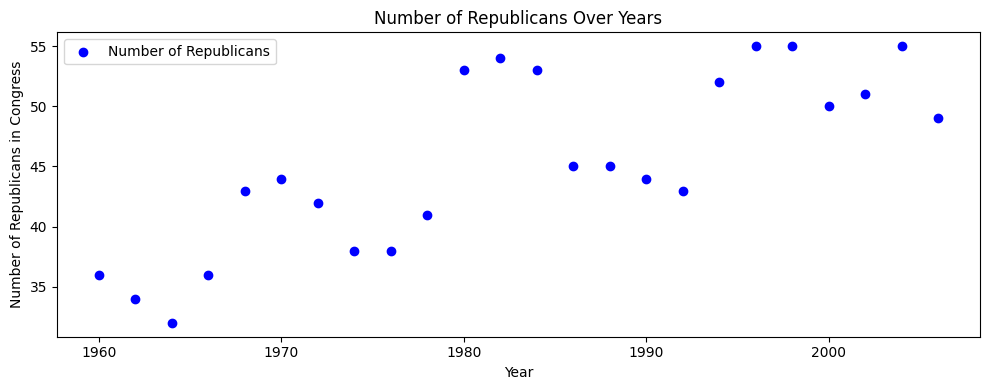

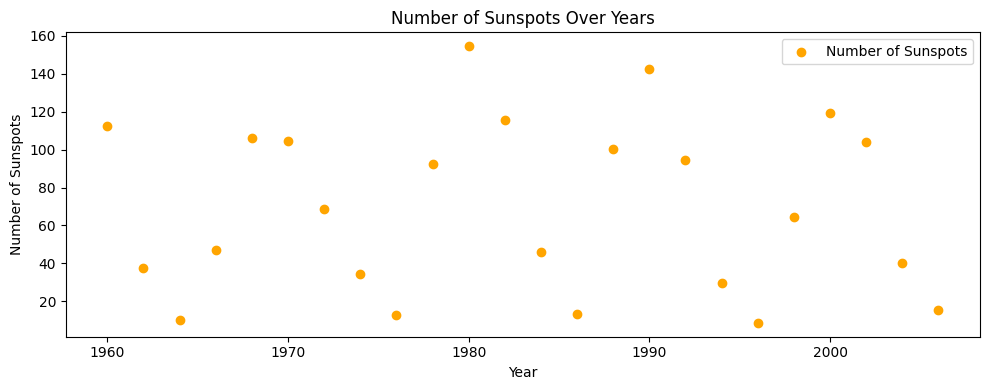

In [2]:
#Question 1:

data=pd.read_csv("year-sunspots-republicans.csv")

# The columns 
years = data['Year']
num_republicans = data['Republican_Count']
num_sunspots = data['Sunspot_Count']

# The scatter plots 

# Create the first figure for the number of Republicans
plt.figure(figsize=(10, 4))
plt.scatter(years, num_republicans, label='Number of Republicans', color='blue')
plt.xlabel('Year')
plt.ylabel('Number of Republicans in Congress')
plt.title('Number of Republicans Over Years')
plt.legend()
plt.tight_layout()
plt.show()

# Create the second figure for the number of Sunspots
plt.figure(figsize=(10, 4))
plt.scatter(years, num_sunspots, label='Number of Sunspots', color='orange')
plt.xlabel('Year')
plt.ylabel('Number of Sunspots')
plt.title('Number of Sunspots Over Years')
plt.legend()
plt.tight_layout()
plt.show()


In [3]:
#Question 2:
data['Year_Scaled'] = (data['Year'] - 1960) / 40
data.head()

,Year,Sunspot_Count,Republican_Count,Year_Scaled
0,1960,112.3,36,0.00
1,1962,37.6,34,0.05
2,1964,10.2,32,0.10
3,1966,47.0,36,0.15
4,1968,105.9,43,0.20


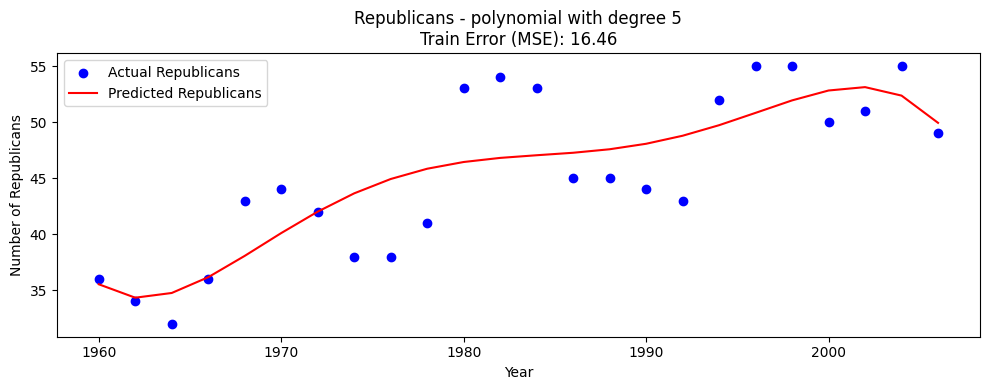

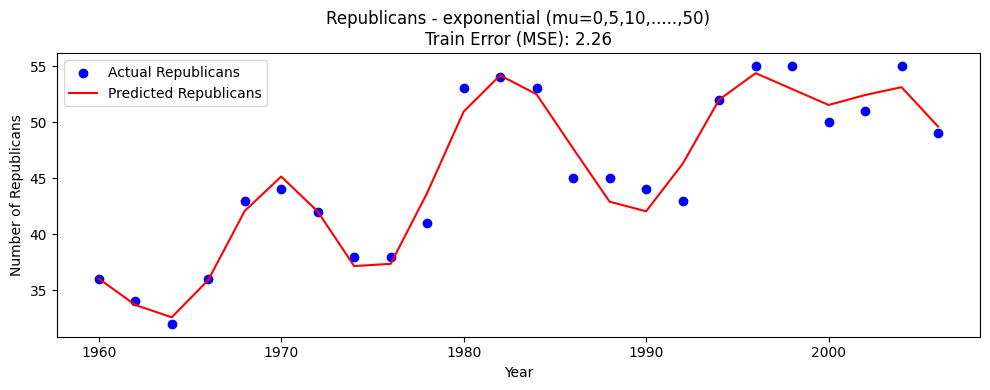

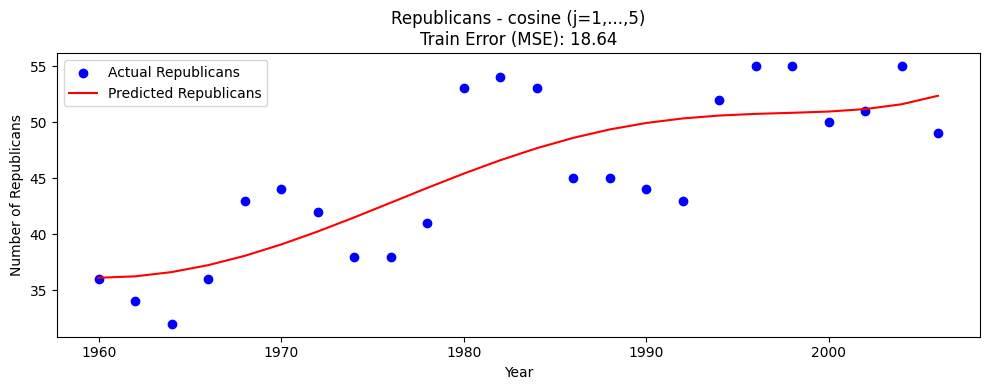

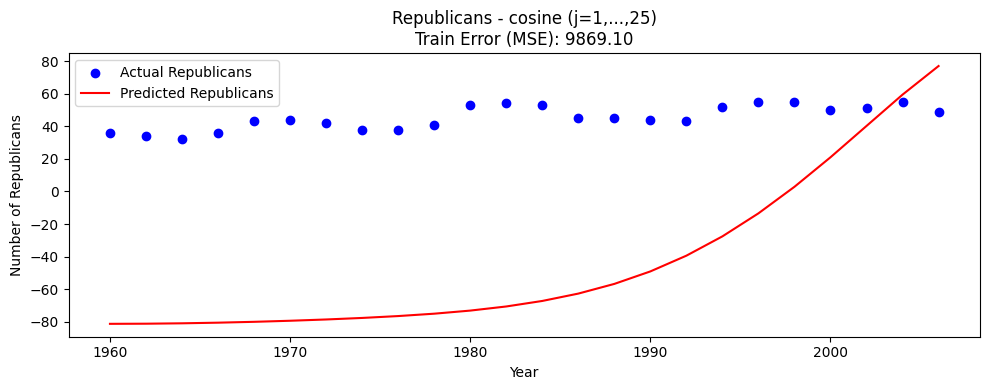

In [4]:
#Question 3 and 4:
X=data['Year_Scaled'].values
Y1=data['Republican_Count'].values

# Functions
def polynomial(X, degree):
    return np.column_stack([np.ones((X.shape[0], 1))] + [X.reshape(-1, 1)**i for i in range(1, degree + 1)])

def exponential(X, mus):
    return np.column_stack([np.ones((X.shape[0], 1))] + [np.exp(-((40*X.reshape(-1, 1) - mu) ** 2) / 25) for mu in mus])

def cosine(X, j):
    return np.column_stack([np.cos(np.pi * X / j) for j in range(1, j)])

# Linear regression using numpy
def fit_linear_regression(X, y):
    XTX = X.T @ X
    XTy = X.T @ y
    weights = np.linalg.inv(XTX) @ XTy
    return weights

def predict(X, weights):
    return X @ weights

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Basis functions
basis_functions = {
    'polynomial with degree 5': polynomial(X, 5),
    'exponential (mu=0,5,10,.....,50)': exponential(X, np.arange(0, 51, 5)),
    'cosine (j=1,...,5)': cosine(X, 5),
    'cosine (j=1,...,25)': cosine(X, 25)
}

for name, basis in basis_functions.items():
    # Fit the model for Republicans
    weights_republicans = fit_linear_regression(basis, Y1)
    y_pred_republicans = predict(basis, weights_republicans)
    mse_republicans = mean_squared_error(Y1, y_pred_republicans)
    
    # Plot for Republicans
    plt.figure(figsize=(10, 4))
    plt.scatter(data['Year'], Y1, label='Actual Republicans', color='blue')
    plt.plot(data['Year'], y_pred_republicans, label='Predicted Republicans', color='red')
    plt.xlabel('Year')
    plt.ylabel('Number of Republicans')
    plt.title(f'Republicans - {name}\nTrain Error (MSE): {mse_republicans:.2f}')
    plt.legend()
    plt.tight_layout()
    plt.show()
    

# Exercice 2.7

In [5]:
import pandas as pd

# Load the dataset
df = pd.read_csv('housing.csv', header=None, delim_whitespace=True)
df.columns = [
        'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 
        'PTRATIO', 'B', 'LSTAT', 'MEDV'
    ]
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Predictor: INDUS
Weights: [-2.064  0.51 ]
MSE: 61.634
R²: 0.165


Predictor: NOX
Weights: [-13.72   31.249]
MSE: 60.755
R²: 0.177


Predictor: RM
Weights: [20.482 -2.684]
MSE: 70.291
R²: 0.048


Predictor: RAD
Weights: [-2.287  0.618]
MSE: 44.950
R²: 0.391


Predictor: TAX
Weights: [-8.528  0.03 ]
MSE: 48.763
R²: 0.340


Predictor: PTRATIO
Weights: [-17.647   1.152]
MSE: 67.633
R²: 0.084


Predictor: LSTAT
Weights: [-3.331  0.549]
MSE: 58.512
R²: 0.208


Predictor: MEDV
Weights: [11.797 -0.363]
MSE: 62.707
R²: 0.151




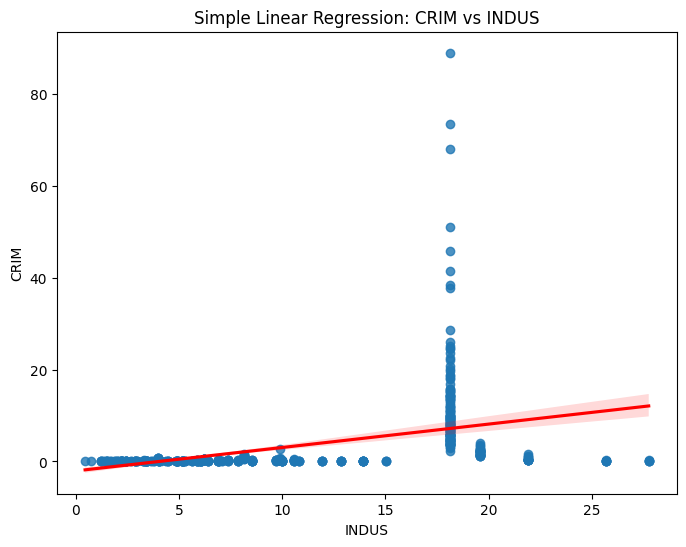

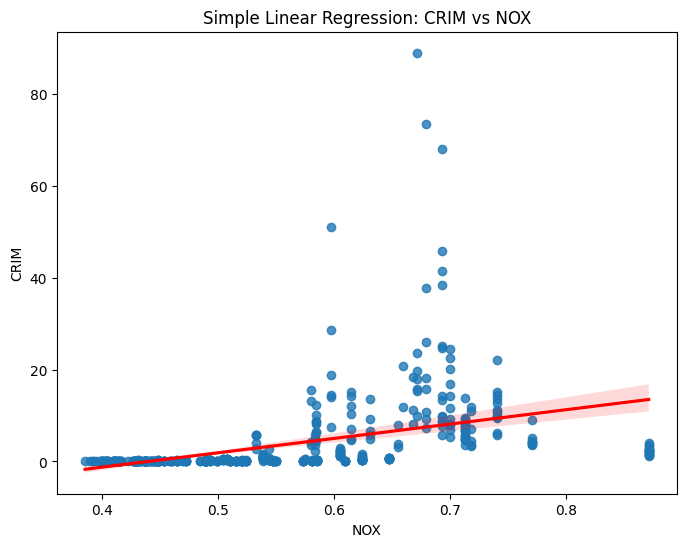

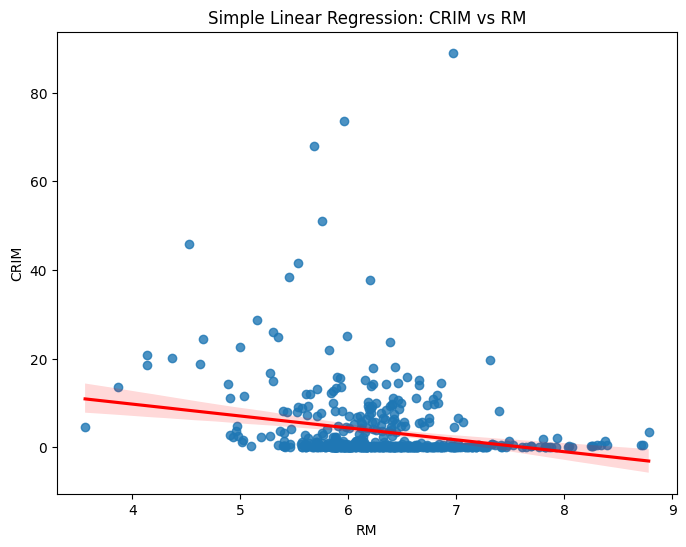

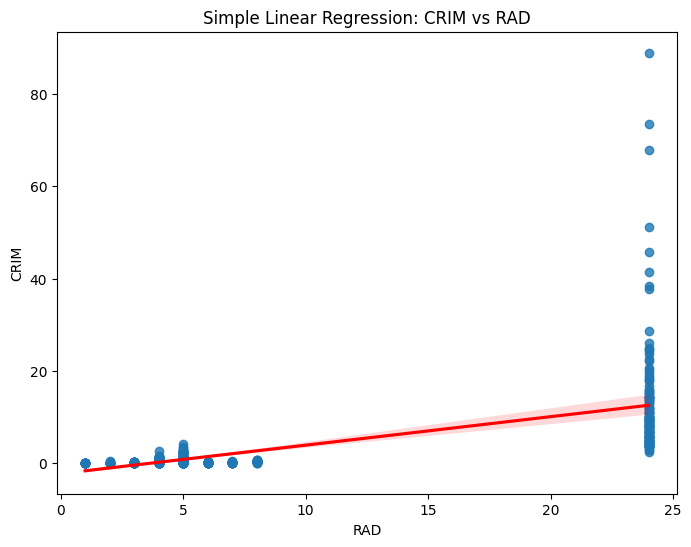

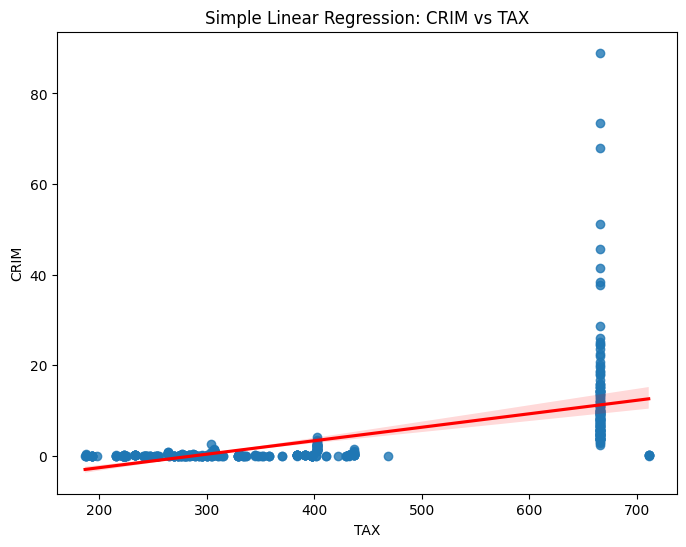

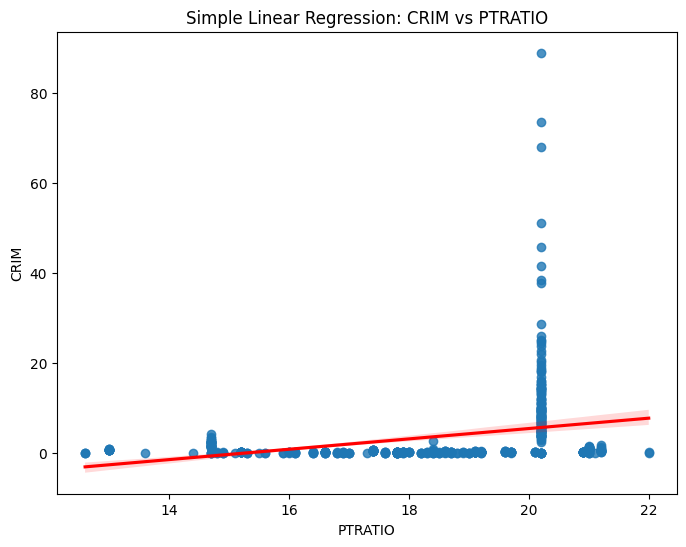

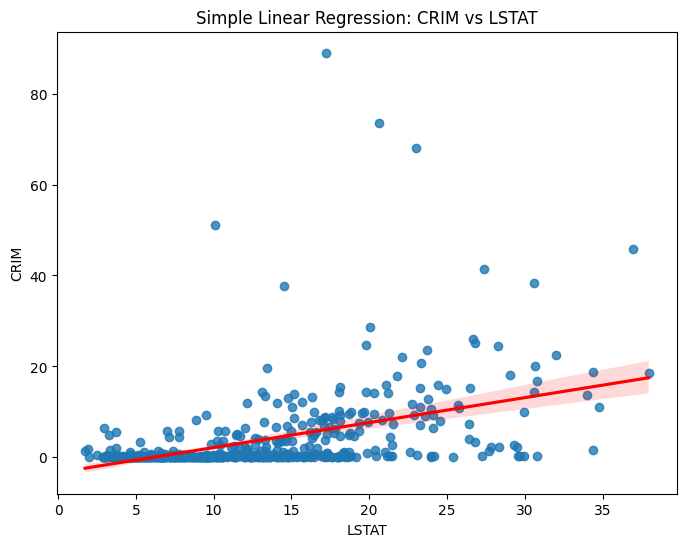

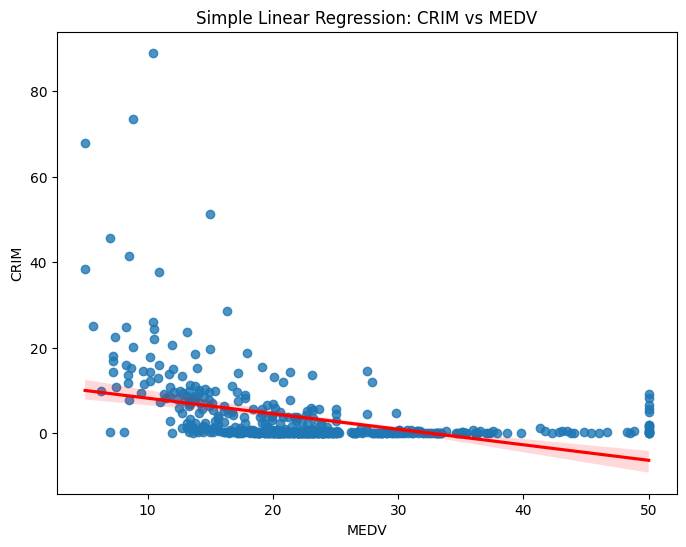

In [6]:

#Question 1:

predictors = ['INDUS', 'NOX', 'RM', 'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV']

# Store the results
simple_regression_results = {}

for predictor in predictors:
    X = df[predictor].values
    y = df['CRIM'].values
    X = np.vstack([np.ones(len(X)), X]).T  
    weights = np.linalg.inv(X.T @ X) @ X.T @ y
    y_pred = X @ weights
    mse = np.mean((y - y_pred) ** 2)
    
    # Calculate R**2
    sst = np.sum((y - np.mean(y)) ** 2)
    ssr = np.sum((y - y_pred) ** 2)
    r_squared = 1 - (ssr / sst)
    
    simple_regression_results[predictor] = (weights, mse, r_squared)
    
    print(f"Predictor: {predictor}")
    print(f"Weights: {weights.round(3)}")
    print(f"MSE: {mse:.3f}")
    print(f"R²: {r_squared:.3f}")
    print("\n")

for predictor in predictors:
    plt.figure(figsize=(8, 6))
    sns.regplot(x=predictor, y='CRIM', data=df, line_kws={'color': 'red'})
    plt.xlabel(predictor)
    plt.ylabel('CRIM')
    plt.title(f'Simple Linear Regression: CRIM vs {predictor}')
    plt.show()

# Analyse of the results: 

- We used simple linear regression models for various predictors. The plots above illustrate the results of these regressions.

- Overall, we observe that for many predictors, a single value can correspond to a wide range of CRIM values, while other values result in lower CRIM levels. This is the case for predictors like INDUS, RAD, TAX, and PTRATIO.

- For variables such as NOX, RM, LSTAT, and MEDV, the data tends to cluster within certain ranges. Although there are some outliers, these variables seems to  exhibit a sort of  linear relationship.

## INDUS
- The positive correlation is weak, with the regression line showing a slight upward trend.
- A cluster of high CRIM values is observed around INDUS levels of 18-20, while most data points are concentrated at lower INDUS values for lower CRIM levels
- It doesn't seems that there is a statistically significant association between INDUS and CRIM 

## NOX 
- There appears to be a positive correlation between NOX and CRIM, more so than with INDUS. The association between NOX and CRIM seems statistically significant.

## RM 
- We can see a weak negative correlation, with substantial variation in CRIM values for some given RM value. Looking at the plot, it is hard to say that there is a statistically significant assocation between RM and CRIM.

## RAD
- There's a distinct pattern with most data points clustered at lower RAD values (1-8) and a large cluster at the highest RAD value (24)
- The positive correlation is primarily driven by the high-RAD cluster 
- The plot doesn't show that there is a statistically significant association between the variables 

## TAX
- There appears to be a weak positive association between TAX and CRIM. The regression line shows a slight upward trend. 
- The relationship doesn't seem very strong or statistically significant due to the high variability in CRIM values, especially at higher TAX levels. 

## PTRATIO 
- This plot shows a weak positive association between PTRATIO and CRIM.
- The relationship doesn't appear statistically significant due to the high variability in CRIM values across the PTRATIO range.

## LSTAT
- There's an association between LSTAT and CRIM. The regression line shows a distinct upward trend, and the data points generally follow this trend. 
- This relationship appears statistically significant, with CRIM values increasing as LSTAT increases, despite some scatter.

## MEDV
- The regression line has a downward slope, and the data points generally follow this trend. 
- The relationship appears statistically significant, with CRIM values decreasing as MEDV increases.


In [7]:
#Question 2: 

# Prepare the data
X = df[predictors].values
y = df['CRIM'].values
X = np.hstack([np.ones((X.shape[0], 1)), X])  

# Fit the multiple regression model
weights = np.linalg.inv(X.T @ X) @ X.T @ y
y_pred = X @ weights
mse = np.mean((y - y_pred) ** 2)

# Calculate R**2
sst = np.sum((y - np.mean(y)) ** 2)
ssr = np.sum((y - y_pred) ** 2)
r_squared = 1 - (ssr / sst)

print("Multiple Regression Model")
print(f"Weights: {weights.round(3)}")
print(f"MSE: {mse:.3f}")
print(f"R²: {r_squared:.3f}")

Multiple Regression Model
Weights: [ 2.906e+00 -1.800e-02 -3.425e+00  7.990e-01  5.940e-01 -2.000e-03
 -3.310e-01  1.960e-01 -1.580e-01]
MSE: 41.905
R²: 0.432


# Results of Question 2 

- The multiple linear regression model performs noticeably better than the simple linear model, with a MSE of 41. This lower MSE means that, on average, the predictions from the multiple regression model are closer to the actual values compared to the simple models.

- Additionally, we see a significant boost in the R² value, which is now 0.43. This means that 43% of the variation in the dependent variable can be explained by the independent variables in the multiple regression model. This is a clear improvement over the simple linear model, showing that including more predictors has helped us better understand the variability in the outcome.


C:\Users\a\AppData\Local\Temp\ipykernel_15188\4043670913.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(predictors))


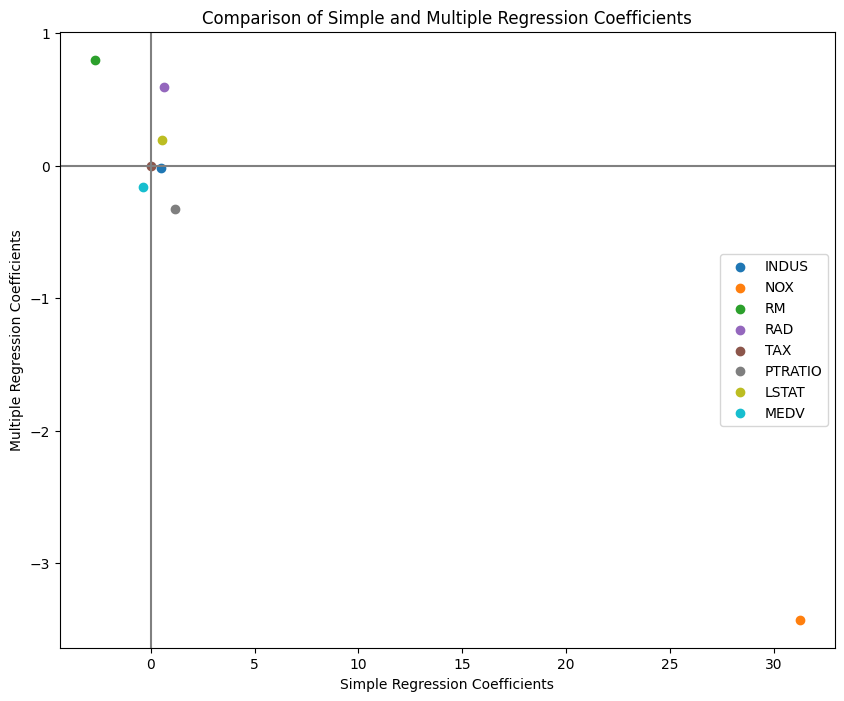

In [8]:
#Question 3:

# Extract coefficients
simple_coefficients = [simple_regression_results[predictor][0][1] for predictor in predictors]
multiple_coefficients = weights[1:]

# Plot the comparison
plt.figure(figsize=(10, 8))
colors = plt.cm.get_cmap('tab10', len(predictors))

for i, predictor in enumerate(predictors):
    plt.scatter(simple_coefficients[i], multiple_coefficients[i], color=colors(i), label=predictor)

plt.xlabel('Simple Regression Coefficients')
plt.ylabel('Multiple Regression Coefficients')
plt.title('Comparison of Simple and Multiple Regression Coefficients')
plt.axhline(0, color='grey')
plt.axvline(0, color='grey')
plt.legend()
plt.show()

# Result of Question 3

- Most coefficients have significantly smaller magnitudes in the multiple regression model compared to the simple linear regression.
- The clustering of most variables near zero in multiple regression suggests that when accounting for other factors, the individual impact of most variables is reduced.
- Some variables have changed signs between the two models. For example, NOX has a large positive coefficient in simple regression but a negative coefficient in multiple regression.

In [9]:
#Question 4:

# Fit polynomial models and check for non-linear associations
for predictor in predictors:
    X = df[predictor].values
    y = df['CRIM'].values
    X_poly = np.column_stack([np.ones(len(X)), X, X**2, X**3])
    weights_poly = np.linalg.inv(X_poly.T @ X_poly) @ X_poly.T @ y
    y_pred_poly = X_poly @ weights_poly
    mse_poly = np.mean((y - y_pred_poly) ** 2)
    
    print(f"Predictor: {predictor} (Polynomial)")
    print(f"Weights: {weights_poly.round(3)}")
    print(f"MSE: {mse_poly:.3f}")
    print("\n")

Predictor: INDUS (Polynomial)
Weights: [ 3.663 -1.965  0.252 -0.007]
MSE: 54.667


Predictor: NOX (Polynomial)
Weights: [  233.087 -1279.371  2248.544 -1245.703]
MSE: 51.911


Predictor: RM (Polynomial)
Weights: [112.625 -39.15    4.551  -0.174]
MSE: 68.835


Predictor: RAD (Polynomial)
Weights: [-0.606  0.513 -0.075  0.003]
MSE: 44.301


Predictor: TAX (Polynomial)
Weights: [19.184 -0.153  0.    -0.   ]
MSE: 46.602


Predictor: PTRATIO (Polynomial)
Weights: [ 4.77184e+02 -8.23610e+01  4.63500e+00 -8.50000e-02]
MSE: 65.439


Predictor: LSTAT (Polynomial)
Weights: [ 1.201e+00 -4.490e-01  5.600e-02 -1.000e-03]
MSE: 57.748


Predictor: MEDV (Polynomial)
Weights: [ 5.3166e+01 -5.0950e+00  1.5500e-01 -1.0000e-03]
MSE: 42.813




# Results for question 4

There is some variables that show evidence of non linear association between them and CRIM.

- For MEDV, the linear model has an MSE of 62.707, while the polynomial model has an MSE of 42.813, showing strong evidence of a non-linear association with a 31.7% reduction in MSE.

- For INDUS, the linear model has an MSE of 61.634, and the polynomial model achieves an MSE of 54.667, providing evidence of a non-linear association with an 11.3% reduction in MSE.

- For NOX, the linear model shows an MSE of 60.755, and the polynomial model reduces this to 51.911, indicating strong evidence of a non-linear association with a 14.6% reduction in MSE.

In [10]:
#Question 5: 

data_transformed = df.copy()
data_transformed['CRIM'] = np.log1p(data_transformed['CRIM'])

for col in predictors:
    if np.abs(data_transformed[col].skew()) > 0.3:
        data_transformed[col] = np.log1p(data_transformed[col])

# Prepare the transformed data
X_transformed = data_transformed[predictors].values
y_transformed = data_transformed['CRIM'].values
X_transformed = np.hstack([np.ones((X_transformed.shape[0], 1)), X_transformed])

weights_transformed = np.linalg.inv(X_transformed.T @ X_transformed) @ X_transformed.T @ y_transformed
y_pred_transformed = X_transformed @ weights_transformed

# Transform the predictions back to the original scale
y_pred_original_scale = np.expm1(y_pred_transformed)

# Calculate the MSE on the transformed data
mse_transformed = np.mean((y_transformed - y_pred_transformed) ** 2)

# Calculate the MSE on the original scale
mse_original_scale = np.mean((df['CRIM'].values - y_pred_original_scale) ** 2)

print("Multiple Regression Model on Transformed Data")
print(f"Weights: {weights_transformed.round(3)}")
print(f"MSE on Transformed Data: {mse_transformed.round(3)}")
print(f"MSE on Original Scale: {mse_original_scale:.4f}")

Multiple Regression Model on Transformed Data
Weights: [-0.413  0.007  2.398  0.264  0.781  0.303 -0.486 -0.121 -0.678]
MSE on Transformed Data: 0.175
MSE on Original Scale: 42.2266


# Results for Question 5

- Initially, after transforming the target variable, the transformed MSE (0.1748) appears much smaller compared to the original MSE (41.9046). This is because the log transformation compresses the range of y, leading to smaller residuals.

- When we convert the predictions back to the original scale, the residuals can become larger, and as a result, the MSE on the original scale might actually increase, as we observed (42 vs. 41).